## Working with GEOREF in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/11_georef.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/11_georef.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/11_georef.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/11_georef.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2georef

In [2]:
from vgrid.conversion.latlon2dggs import latlon2georef

lat = 10.775276
lon = 106.706797
res = 3
georef_id = latlon2georef(lat, lon, res)
georef_id

'VGBL424465'

### GEOREF to Shapely Polygon

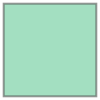

In [3]:
from vgrid.conversion.dggs2geo.georef2geo  import georef2geo

georef_geo = georef2geo(georef_id)
georef_geo

### GEOREF to GeoJSON        

In [4]:
from vgrid.conversion.dggs2geo.georef2geo import georef2geojson

georef_geojson = georef2geojson(georef_id)
georef_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.70666666666668, 10.775),
      (106.70833333333334, 10.775),
      (106.70833333333334, 10.776666666666667),
      (106.70666666666668, 10.776666666666667),
      (106.70666666666668, 10.775)),)},
   'properties': {'georef': 'VGBL424465',
    'resolution': 3,
    'center_lat': 10.7758333,
    'center_lon': 106.7075,
    'cell_width': 182.283,
    'cell_height': 184.355,
    'cell_area': 33604.66,
    'cell_perimeter': 733.275}}]}

### GEOREF Generator

Generating GEOREF DGGS: 100%|██████████| 288/288 [00:00<00:00, 1504.12 cells/s]


<Axes: >

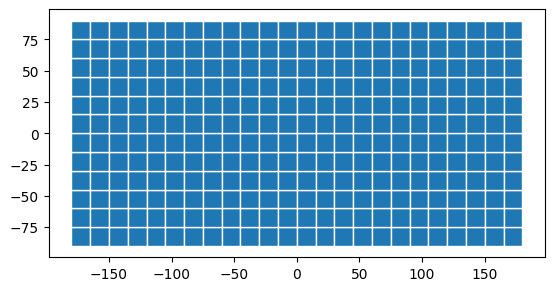

In [5]:
from vgrid.generator.georefgrid import georefgrid
georef_grid = georefgrid(resolution=0,output_format="gpd")
# georef_grid = georefgrid(resolution=3,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")
georef_grid.plot(edgecolor="white")

### GEOREF Inspect

In [6]:
from vgrid.stats.georefstats import georefinspect 
resolution = 1
georef_inspect = georefinspect(resolution)    
georef_inspect.head()

Generating GEOREF DGGS: 100%|██████████| 64800/64800 [00:33<00:00, 1955.31 cells/s]


georef  resolution  center_lat  center_lon  cell_width  cell_height  \
0  AAAA0000           1       -89.5      -179.5       0.000   111693.865   
1  AAAB0000           1       -88.5      -179.5    1949.302   111693.177   
2  AAAC0000           1       -87.5      -179.5    3897.998   111691.803   
3  AAAD0000           1       -86.5      -179.5    5845.483   111689.743   
4  AAAE0000           1       -85.5      -179.5    7791.152   111687.001   

      cell_area  cell_perimeter  \
0  1.088612e+08      225337.032   
1  3.265476e+08      229233.655   
2  5.441267e+08      233127.087   
3  7.615267e+08      237016.121   
4  9.786761e+08      240899.554   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-179 -90, -179 -89, -180 -89, -180 -...    False   0.013830   
1  POLYGON ((-179 -89, -179 -88, -180 -88, -180 -...    False   0.041485   
2  POLYGON ((-179 -88, -179 -87, -180 -87, -180 -...    False   0.069127   
3  POLYGON ((-179 -87, -179 -86, -180 -86, -180 -...    False   0.096746   
4  POLYGON ((-179 -86, -179 -85, -180 -85, -180 -...    False   0.124333   

        ipq       zsc  
0  0.026941  0.164138  
1  0.078091  0.279447  
2  0.125813  0.354701  
3  0.170349  0.412733  
4  0.211922  0.460350

### Distribution of GEOREF Area Distortions

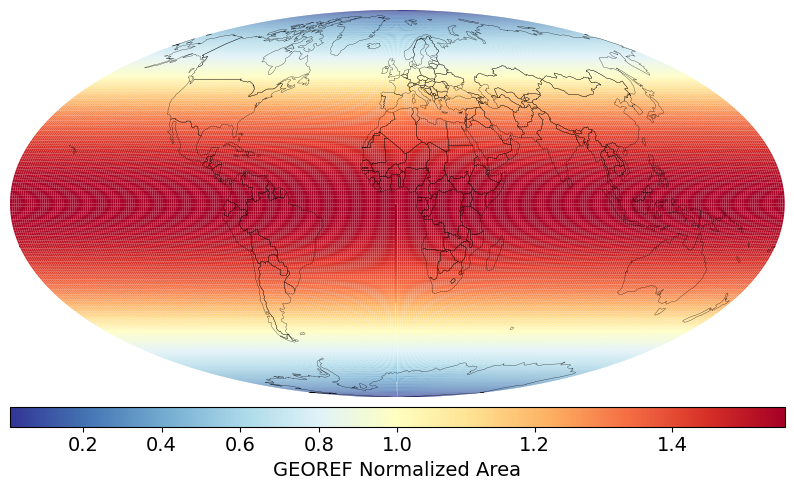

In [7]:
from vgrid.stats.georefstats import georef_norm_area
georef_norm_area(georef_inspect)

### Distribution of GEOREF IPQ Compactness

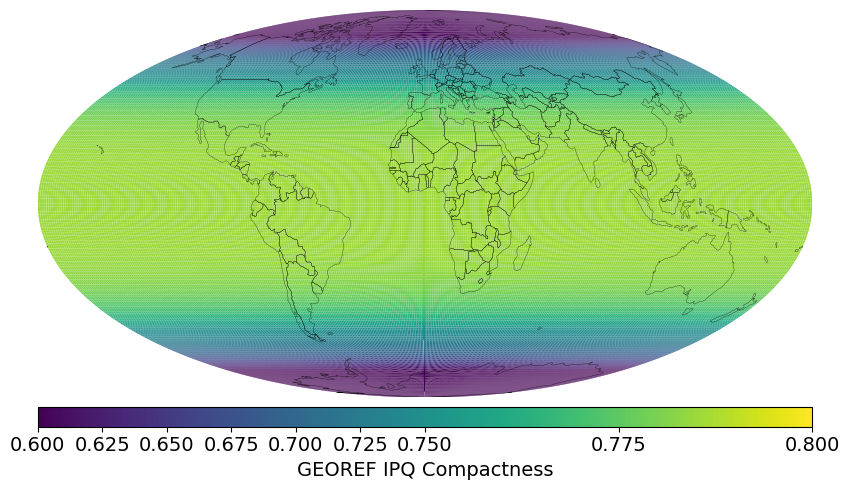

In [8]:
from vgrid.stats.georefstats import georef_compactness
georef_compactness(georef_inspect)

### GEOREF Statistics

In [9]:
from vgrid.stats import georefstats            
georefstats('km')

resolution                number_of_cells  avg_edge_len_km  \
0            0                            288     1.330812e+03   
1            1                          64800     8.872082e+01   
2            2                      233280000     1.478680e+00   
3            3                    23328000000     1.478680e-01   
4            4                  2332800000000     1.478680e-02   
5            5                233280000000000     1.478680e-03   
6            6              23328000000000000     1.478680e-04   
7            7          233280000000000000000     1.478680e-06   
8            8        23328000000000000000000     1.478680e-07   
9            9    233280000000000000000000000     1.478680e-09   
10          10  23328000000000000000000000000     1.478680e-10   

    avg_cell_area_km2  
0        1.771061e+06  
1        7.871383e+03  
2        2.186495e+00  
3        2.186495e-02  
4        2.186495e-04  
5        2.186495e-06  
6        2.186495e-08  
7        2.186495e-12  
8        2.186495e-14  
9        2.186495e-18  
10       2.186495e-20